In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.datasets import mnist

#load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

2022-04-17 03:05:01.575438: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-17 03:05:01.575462: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


11501568/11490434 [==============================] - 2s 0us/step


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.backend import sign
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

In [3]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize the data
X_train /= 255.0
X_test /= 255.0

In [5]:
# change input dimensions to 3 for LSTM input
X_train = np.reshape(X_train, (60000, 28, 28))
X_test = np.reshape(X_test, (10000, 28, 28))

In [6]:
#convert y values to one hot encoding format
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Train the LSTM model

In [7]:
# LSTM model
model = Sequential()

model.add(LSTM(256, input_shape=(X_train.shape[1], 28)))
model.add(Dropout(0.15))
model.add(Dense(10, activation="sigmoid"))

model.summary()

2022-04-17 03:05:16.343131: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-17 03:05:16.343283: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (galib-HP-ENVY-Notebook): /proc/driver/nvidia/version does not exist
2022-04-17 03:05:16.344409: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               291840    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________


In [8]:
adam_modified = optimizers.Adam(learning_rate=0.005, beta_1=0.7, beta_2=0.9, amsgrad=False)

model.compile(loss="categorical_crossentropy", optimizer=adam_modified, metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 74s 48ms/step - loss: 0.3034 - accuracy: 0.9051 - val_loss: 0.0927 - val_accuracy: 0.9730
Epoch 2/5
1500/1500 [==============================] - 64s 43ms/step - loss: 0.0968 - accuracy: 0.9746 - val_loss: 0.0731 - val_accuracy: 0.9818
Epoch 3/5
1500/1500 [==============================] - 76s 50ms/step - loss: 0.0758 - accuracy: 0.9799 - val_loss: 0.0896 - val_accuracy: 0.9783
Epoch 4/5
1500/1500 [==============================] - 81s 54ms/step - loss: 0.0672 - accuracy: 0.9836 - val_loss: 0.0730 - val_accuracy: 0.9827
Epoch 5/5
1500/1500 [==============================] - 73s 49ms/step - loss: 0.0605 - accuracy: 0.9848 - val_loss: 0.0723 - val_accuracy: 0.9853


In [18]:
predictions = model.predict(X_test)  

accuracy_score(np.argmax(Y_test, axis=1), np.argmax(predictions, axis=1))

0.9823

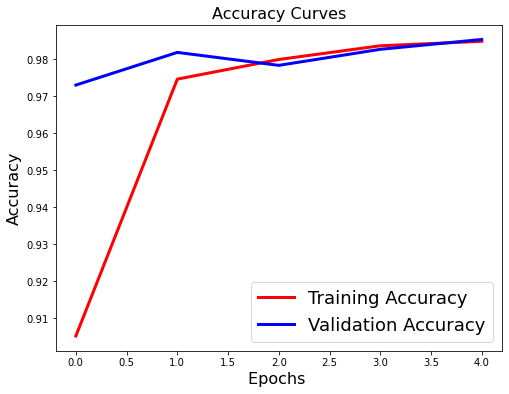

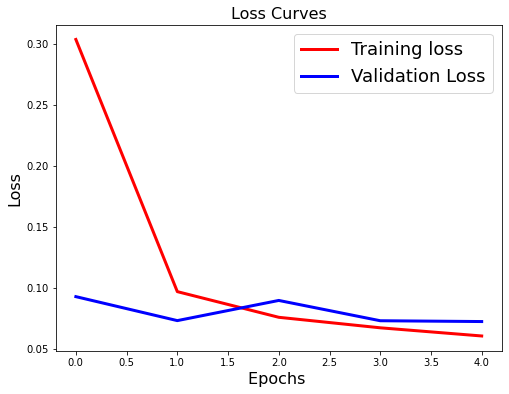

In [19]:
#plot the loss and accuracy curves
def loss_curve(history):
    
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

def accuracy_curve(history):
    
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    
accuracy_curve(history)
loss_curve(history)

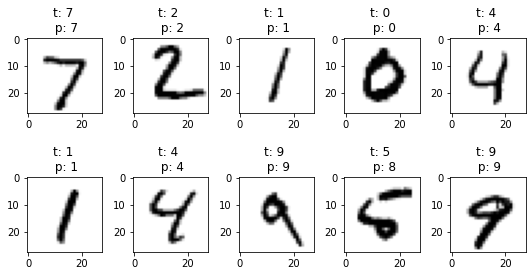

In [28]:
#we should review 
def plot_predictions(x_test, y_true, y_prediction):
    #indice = rd.choice(np[0])   random 10 values
    num_cols = 5
    num_rows = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols,2*num_rows))
    for i in range(len(x_test)):
        ax = axes[i//num_cols, i%num_cols]
        ax.imshow(x_test[i], cmap='gray_r') 
        ax.set_title('t: {} \n p: {}'.format(np.argmax(y_true[i]), np.argmax(y_prediction[i])))
    plt.tight_layout()
    plt.show()
    
plot_predictions(X_test[:10], Y_test[0:10], predictions[0:10])

# Generating adversarial attack

In [29]:
tf.version

<module 'tensorflow._api.v2.version' from '/home/galib/anaconda3/lib/python3.8/site-packages/tensorflow/_api/v2/version/__init__.py'>

In [30]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        
        loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

signed = adversarial_pattern(X_test, Y_test)

/home/galib/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [39]:
perturbed_data = X_test + 0.2 * signed #0.2
X_perturbed = perturbed_data.numpy()

In [46]:
adversarial_predictions = model.predict(X_perturbed)
accuracy_score(np.argmax(Y_test, axis = 1), np.argmax(adversarial_predictions, axis=1))

0.119

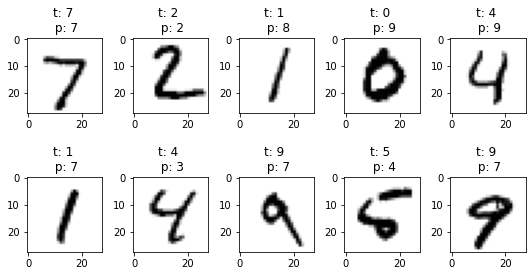

In [47]:
plot_predictions(X_test[:10], Y_test[0:10], adversarial_predictions[0:10])

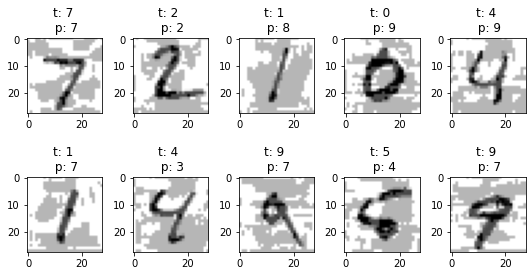

In [48]:
plot_predictions(X_perturbed[:10], Y_test[0:10], adversarial_predictions[0:10])

Apply adversarial attack iteratively

In [51]:
def itrAdvAttacks(itr, epsilon, alfa, image, label):
    adversarial = image
    for i in range(itr):
        n = alfa * adversarial_pattern(adversarial, label)
        adversarial += n
        maxValues = np.maximum((image-epsilon), np.array(adversarial)) 
        adversarial = np.minimum((image+epsilon), maxValues)
        
        itrPrediction = model.predict(adversarial)
        #print(i, np.array(itrPrediction).shape)
        print("iteration ", (i+1) , accuracy_score(np.argmax(Y_test, axis=1), np.argmax(itrPrediction, axis=1)))
    
    return adversarial

iterativeAdv = itrAdvAttacks(5, 0.1, 0.05, X_test, Y_test)

/home/galib/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


iteration  1 0.7751


/home/galib/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


iteration  2 0.2412


/home/galib/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


iteration  3 0.093


/home/galib/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


iteration  4 0.0362


/home/galib/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


iteration  5 0.0246


In [52]:
itrPred = model.predict(iterativeAdv)

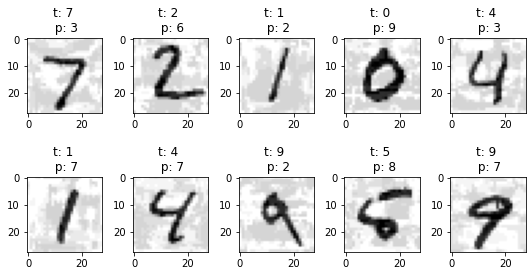

In [ ]:
plot_predictions(iterativeAdv[:10], Y_test[0:10], itrPred[0:10])